In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("/home/placement/Desktop/venkatesh/Advertising.csv")

In [3]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data1=data.drop(['Unnamed: 0'],axis=1)

In [6]:
data1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
y=data['sales']                
X=data1.drop('sales',axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters)

lasso_regressor.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [10]:
lasso_regressor.best_params_

{'alpha': 1}

In [11]:
lasso=Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_lasso)

0.8589079527148957

In [13]:
Results=pd.DataFrame(columns=['Sales','Predicted'])
Results['Sales']=y_test
Results['Predicted']=y_pred_lasso
Results=Results.reset_index()
Results['Id']=Results.index
Results

,index,Sales,Predicted,Id
0,95,16.9,16.523920,0
1,15,22.4,21.058219,1
2,30,21.4,21.624966,2
3,158,7.3,10.745724,3
4,128,24.7,22.188269,4
...,...,...,...,...
61,97,15.5,15.301341,61
62,31,11.9,11.472707,62
63,12,9.2,11.035086,63
64,35,12.8,16.702405,64


[]

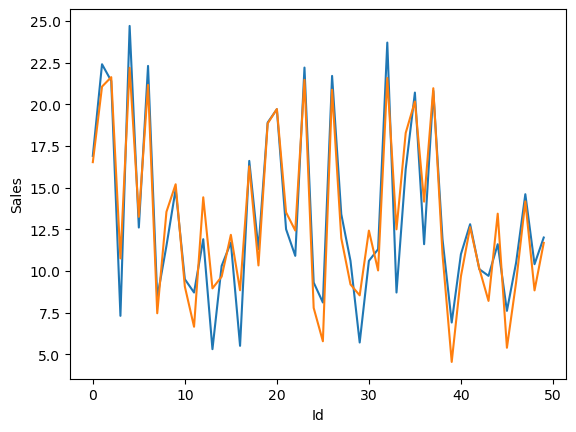

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Sales',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()